
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
medical_df = pd.read_csv('medical-charges.csv')

# Explicit is better than implicit. By default it is already 5 rows :)
medical_df.head(n=5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Думки та висновки:**
1. smoker - курці можуть мати вищі медичні витрати через погіршення здоров'я, і тому це вагомий фактор для прогнозування витрат.
2. age - люди похилого віку можуть мати вищі медичні витрати через погіршення здоров'я, і тому це вагомий фактор для прогнозування витрат.
3. bmi - люди з високим і низьким індексом маси тіла можуть мати вищі медичні витрати через погіршення здоров'я, і тому це вагомий фактор для прогнозування витрат.
4. Регіон може впливати, якщо ми знаємо, що в деяких регіонах медичні послуги дорожчі або дешевші або там більше або менше хворих. Також я би казав про екологію цього райому, що в перспективі може впливати на здоров'я мешканців (це вже по історичним даним можна буде побачити наших клієнтів)
5. Діти до 9 років не мають мигдалин і тому батьки до цього віку дітей будуть часто хворіти. Якщо дітей більше, то витрати можуть бути вищі.
6. Комплексний підхід із мультиклікатором, коли там 2-3 фактори впливають на витрати одночасно.
7. Я би ще, можливо, розглянув, що у жінок трохи вище затрати, бо вони більш піддаються стресу і тому частіше хворіють + вірогідність іншим жіночих хвороб, які у сучасному світі дуже дорогі у лікуванні.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

Аналіз `sex` та `charges` колонки:

In [33]:
medical_df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [65]:
# Example: https://plotly.com/python/histograms/#visualizing-the-distribution
fig = px.histogram(medical_df,
                       x="charges",
                       marginal="box",
                       color="sex",
                       barmode="group",
                       title="Medical Charges by Sex",
                       color_discrete_map={'female': 'pink', 'male': 'blue'},
                       template="plotly_dark")
fig.update_layout(bargap=0.1)
fig.show()

Аналіз `region` та `charges` колонки:

In [37]:
medical_df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [60]:
# Example: https://plotly.com/python/histograms/#visualizing-the-distribution
fig = px.histogram(medical_df,
                       x="charges",
                       marginal="box",
                       color="region",
                       title="Medical Charges by Region",
                       template="plotly_dark")
fig.update_layout(bargap=0.1)
fig.show()

Намалюємо зведену таблицю даних по `sex` та `region`:

In [64]:
fig = px.histogram(
    medical_df,
    x="charges",
    color="sex",
    facet_col="region",
    marginal="box",
    title="Distribution of Medical Charges by Sex and Region",
    color_discrete_map={'female': 'pink', 'male': 'blue'},
    template="plotly_dark"
)

fig.show()

**Спостереження:**
1. Чоловіки мають вищі медичні витрати, ніж жінки. (хоча мені здавалось навпаки до аналізу, але тут такий dataset)
2. southeast регіон має найвищі медичні витрати
3. Найбільше зборів до `10k$`.
4. Після `34k$` ми бачимо, що червоний (southeast) регіон має найбільше витрат.


**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [52]:
region_counts = medical_df['region'].value_counts()

fig = px.histogram(medical_df,
                       x="region",
                       color="smoker",
                       title="Smoker by regions",
                       barmode="group",
                       template="plotly_dark",
                       text_auto=True)
fig.update_layout(bargap=0.1, xaxis_title="Region (Total count)", yaxis_title="Count")

fig.update_xaxes(
    ticktext=[f"{region} ({count})" for region, count in region_counts.items()],
    tickvals=region_counts.index
)

fig.show()

In [54]:
children_counts = medical_df['children'].value_counts()

fig = px.histogram(medical_df,
                       x="children",
                       color="smoker",
                       title="Smoker by quantity of children",
                       barmode="group",
                       template="plotly_dark",
                       text_auto=True)
fig.update_layout(bargap=0.1)

fig.update_xaxes(
    ticktext=[f"{children} ({count})" for children, count in children_counts.items()],
    tickvals=children_counts.index
)

fig.show()

**Висновки:**
1. southeast регіон має найбільше курців, а northwest та southwest - найменше.
2. Кількість у southwest та northwest є однакова.
3. Люди з 0 дітьми курять найбільше, але вони також найбільш некурці. Це найбільша група є в цьому датасеті.
4. Людей із 5 дітьми найменше, але вони і не курять.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [86]:
fig = px.violin(medical_df,
                    x="children",
                    y="charges",
                    color="children",
                    box=True,
                    points="all",
                    title="Medical Charges by Children",
                    template="plotly_dark")

fig.update_layout(xaxis_title="Children", yaxis_title="Charges")
fig.update_layout(width=1200, height=900)
fig.show()

**Спостереження:**
1. Люди з 5 дітьми мають найменші медичні витрати і вони не пересікають `20k$`
2. Найбільші витрати видно, що не залежать від кількості дітей, бо як бачимо, що люди з 0 дітьми мають найбільші витрати насправді
3. Бо "скрипці" видно, що більша щільність є в діапозоні `3-10k$`
4. Для людей з 0 дітьми, видно, що є 2 таких розподіли явних. Це в районі ~`2.6k$` та ~`11.7$`.
5. Для людей з 2 та 3 дітьми, видно, що Q3 (75% даних і менше) сплачують до ~20k$ за медичні послуги. Так само і для людей з 1 дитиною він буде вищий, ніж для людей з 0 дітьми.
6. Всі категорії мають викиди, але найбільше в категорії 0 дітей.

**NOTE до кураторів: потребую допомоги як тут правильно аналізувати і на що звертати увагу. Якщо можливо, будь ласка, дайте якісь поради, як краще аналізувати ці дані.**

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [87]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [88]:
def estimate_charges(age, w, b):
    return w * age + b

In [89]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

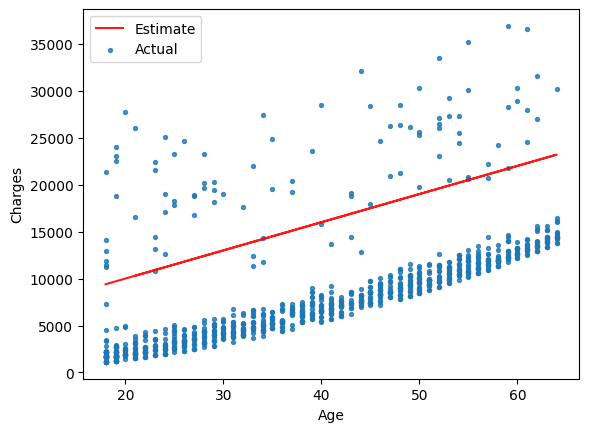

In [90]:
# Functions which were used in Lection
# try_parameters(60, 200)
# try_parameters(400, 5000)

# Let's try to find the best parameters
try_parameters(non_smoker_df, 300, 4000)

In [91]:
# Покращимо функцію, щоб вона могла на одному графіку виводити усі спроби одразу
def try_parameters_multiple(df, params_list):
    target = df.charges
    ages = df.age

    plt.scatter(ages, target, s=8, alpha=0.8, label='Actual')  # Відображення фактичних даних

    for i, (w, b) in enumerate(params_list, start=1):
        estimated_charges = estimate_charges(ages, w, b)
        plt.plot(ages, estimated_charges, alpha=0.9, label=f'Estimate {i} (w={w}, b={b})')

    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend()
    plt.show()

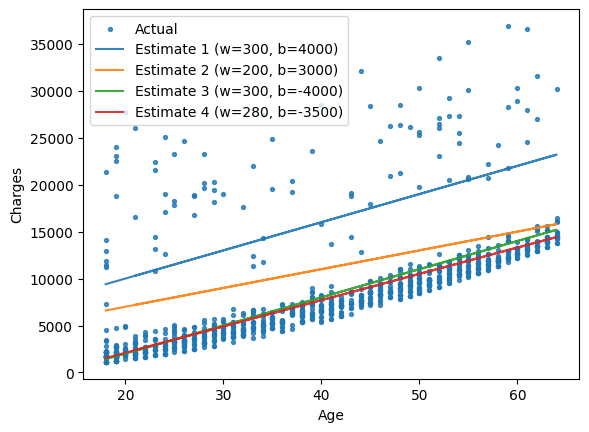

In [104]:
params_list = [
    (300, 4000),
    (200, 3000),
    (300, -4000),
    (280, -3500),
]

try_parameters_multiple(non_smoker_df, params_list)

**Спостереження:**
1. Чим більше `w`, тим більше кут нахилу лінії.
2. Чим більше `b`, тим більше зміщення лінії вгору (або вниз, якщо це відʼємне значення).
3. Треба використати відʼємне значення `b`, щоб лінія була ближче до даних.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [106]:
def calculate_rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [108]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [107]:
for param_list in params_list:
    w, b = param_list
    predictions = estimate_charges(non_smoker_df.age, w, b)
    rmse = calculate_rmse(non_smoker_df.charges, predictions)
    print(f'w={w}, b={b}, RMSE={rmse}')

w=300, b=4000, RMSE=8742.744920994286
w=200, b=3000, RMSE=5348.118625100509
w=300, b=-4000, RMSE=4725.9133994520325
w=280, b=-3500, RMSE=4753.176967946348


**Висновок:**
1. Найменше значення RMSE (4725.91) маємо при параметрах `w=300, b=-4000` із чотирьох спроб. Видно, що 2 останні параметри найкращі, бо ті прямі прям проходять ті дані.
2. Це значно менше, ніж стандартне відхилення `12110.01`.
